# Integração Python e Web

### Objetivo

- Quando integramos o Python com a Web temos 2 objetivos:
    1. Automatizar algum processo que seja feito no seu navegador
    
    2. Puxar informações de sites automaticamente 

Dependendo do seu objetivo, podem existir outras formas de puxar informações de sites diferentes, como APIs, Bibliotecas prontas, etc. Mas o Selenium vai ser sempre uma opção para a gente e por isso é muito bom ter essa carta na manga.

### O que vamos usar

- Selenium -> uma das bibliotecas mais usadas para web-scraping -> navegar na web com código e fazer alguma coisa ou pegar alguma informação.

- Essa é uma biblioteca diferente, porque ela precisa de um driver no seu computador para funcionar. No caso, usaremos o ChromeDriver (disponível para download abaixo da aula)

Como tudo no Python, existem outras bibliotecas como a BeautifulSoup que podem ajudar em tarefas específicas também, mas vamos focar no Selenium por ser a mais usada e ser muito versátil.


Obs: Caso esteja usando o Google Colab, o navegador não vai abrir ativamente no seu computador, ele vai ficar escondido porque abre no computador onde está rodando o código. Para então fazer tudo funcionar, eu gravei um vídeo para você que está na plataforma que repliquei esse passo a passo que encontrei na internet: https://www.it-swarm-pt.tech/pt/selenium/como-podemos-usar-o-selenium-webdriver-em-colab.research.google.com/806263350/

### Projeto Completo

Vamos fazer aqui nesse módulo uma introdução para você entender como funciona e resolver um desafio, mas vamos usar mais e de forma mais completa na Aplicação de Mercado de Trabalho de Automações

### Abrindo um navegador

In [6]:
from selenium import webdriver

driver = webdriver.Firefox()
driver.get("http://www.hashtagtreinamentos.com")
print(driver.title)

Hashtag Treinamentos Aprenda TUDO de Excel, VBA e Power BI Aqui!


# Acessa o site sem abrir o Navegador

In [ ]:
firefox_options = webdriver.FirefoxOptions()
firefox_options.add_argument('-headless')
#driver = webdriver.Firefox(options=firefox_options)
driver = webdriver.Firefox(executable_path=r'/home/dikson/anaconda3/bin/geckodriver',options=firefox_options)
driver.get("http://www.hashtagtreinamentos.com")
print(driver.title)

# Como funciona "navegar" na Web -> Web-Scraping

"""
Ao contrário do que vimos em RPA onde usavamos prints/figuras para
ir até certa parte da tela e executar uma ação. Com Selenium , iremos
usar o codigo da página clicando em “inspecionar” e colhendo a porção
de código HTML do local da pagina com o qual queremos interagir. 
"""

# Aula 05 -> Metodos Uteis do Selenium

Módo 'Selenium' de encontrar parte da tela com a qual se quer interagir.
Para selecionar elementos teremos os find_element e find_elements -> a biblioteca tem vários exemplos disso aqui:
https://selenium-python.readthedocs.io/locating-elements.html

Neste link temos várias formas para identificar/interagir com uma página.



Sempre que precisar interagir com uma parte da página (campo ou botão), clique com o botão direito em cima do elemento, e clique em 'especionar'. Clique no botão 'sétinha' no canto superior esquerdo da janela de inspeção, clique novamente no elemento o qual você quer interagir, e será mostrada\selecionada a porção de codigo referente ao elemento da página.

Procure uma identificação unica do elemento como 'ID' ou 'Classe'.






elemento = driver.find_element_by_id('id_do_objeto') -> 1 único elemento com aquele id

elementos = driver.find_elements_by_id('id_do_objeto') -> lista com vários elementos com aquele id

Normalmente id é uma identidade única de um elemento, mas isso não é 100% garantido.





In [1]:
# Exemplo:
import time

driver = webdriver.Firefox()
driver.get("http://www.hashtagtreinamentos.com")
time.sleep(3)
#Sendo 'btn-laranja' o elemento que interagimos/clicamos.
driver.find_element_by_class_name('btn-laranja').click()



NameError: name 'webdriver' is not defined

In [23]:
driver = webdriver.Firefox()
driver.get("http://www.hashtagtreinamentos.com")
time.sleep(3)



In [26]:
# 'FullName' é o nome do campo para preenchimento do primeiro nome no site
# len() nos disse que existem dois deles com o mesmo nome
elementos = driver.find_elements_by_name('fullname')
print(len(elementos))

2


In [28]:
# Vamos tentar preencher o primeiro da lista (de 2) e ver se ele é ele.

#elemento_input.send_keys('texto') -> preenche o campo com texto


elementos[0].send_keys('Dikson')

# FUNCIONOU !   :)


In [29]:
# Preencher o campo E-mail (poderia usar até o mesmo nome de variavel 'elementos'.)

email = driver.find_elements_by_name('email')
email[0].send_keys('dikson_santo@gmail.com')

# ALL RIGHT MAN !!!

In [30]:
# Apontei na area que contém os campos 'E-mail' & 'Nome' , encontrei
#..o ID do formulário, e usei o método .submit() 

driver.find_element_by_id('_form_6163E5AC6C36D_').submit()


# Ou poderia usar o ID do botão 'Enviar' , também funcionaria.

In [31]:
# Depois de testado parte a parte. Pode inserir todo o conteúdo em Uma celula.

### XPath

- Vantagem: Serve para qualquer elemento e é fácil de aplicar
- Desvantagem: Dependendo do XPath, alterações mais simples no site podem fazer ele parar de funcionar (coisa que com id e classe é mais difícil de acontecer)

In [32]:
# Vamos preencher o mesmo formulário da última aula e enviar as informações, no site da hashtag
# from selenium import webdriver

driver = webdriver.Firefox()

driver.get("https://hashtagtreinamentos.com")

Xpaths -> São codigos que identificam um elemento de uma página.

Eles devem ser passados usando aspas simples, pois estes códigos vem com aspas Duplas, Se usar aspas duplas também, vai dar problema. 

Como podemos ver na imagem a baixo, XPath é uma opção

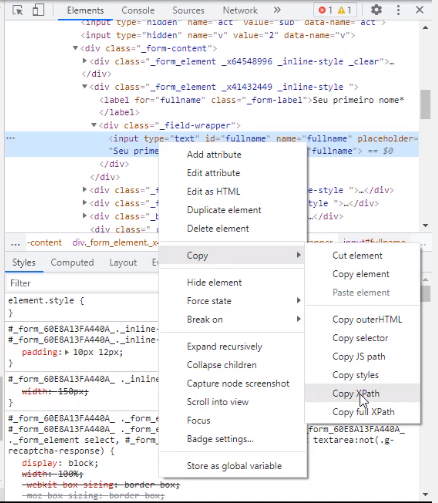

In [ ]:
#                           '//*[@id="Isso é o XPath"]'   
driver.find_element_by_xpath('//*[@id="fullname"]').send_keys("Lira")

# XPath do campo 'E-mail'
driver.find_element_by_xpath('//*[@id="email"]').send_keys("pythonimpressionador@gmail.com")

# Submeter
driver.find_element_by_xpath('//*[@id="_form_173_submit"]').click()

Se a página sofrer edição. O XPath é modificado. Já se conseguirmos (ao invés do XPath) Usar o ID do elemento, é mais seguro, pois estes geralmente nunca mudam. 

# Metodos para esperar elementos carregarem, para então poder interagir com a página:

### Esperar o Elemento carregar

2 métodos:


- WebDriverWait + ExpectedConditions (EC)
    - Nativo do Selenium, menos linhas de código
    - Já vi dar bug e mais chatinho de lembrar
- Loop de espera
    - Criação de uma espera "manual"
    - Nunca abandona

In [33]:
# METODO COM WebDriverWait e EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Firefox()
driver.get("https://hashtagtreinamentos.com")

# Elemento simboliza quem estamos esperando carregar
# Assim que o elemento aparece, ele é armazenado nesta variavel
# Função_Espera(navegador, Segundos).Até a presença do elemento(((Apontado Por Classe de Elemento "Fecha_Pagina")))
elemento = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CLASS_NAME,"eicon-close")))

# Um temponho a mais para evitar erros de falta de sincronia no carregamento.
time.sleep(1)


# E então quando este elemento (que estava sendo esperado) se fizer presente
#..clique nele:
elemento.click()

print('Fechamos !!')



Fechamos !!


# Metodo Usando While:

In [41]:
# Loop

driver = webdriver.Firefox()
driver.get("https://hashtagtreinamentos.com")

#Enquanto Não encontrar o elemento de fechar Pop-Up, espere 1 Segundo
while len(driver.find_elements_by_class_name("eicon-close")) == 0:
    time.sleep(1)  
time.sleep(1)
    
# Encontrou o elemento -> Sai do Loope Clica em Fechar:
driver.find_element_by_class_name("eicon-close").click()

# Tudo OK
print("Feito !!")

Feito !!


# Desafio - Rotina de Baixar uma Planilha da Web
 

- Imagine que você trabalhe no Mercado Financeiro e tem que todo dia/semana baixar uma planilha com as cotações do dólar
- Usaremos o site investing.com para baixar esses dados
- O link onde ficam esses dados é: https://br.investing.com/currencies/usd-brl-historical-data
- Escolhemos o site investing.com porque ele é cheio de coisinha chata que vai obrigar a gente a fazer um código completo
- Crie uma conta no site antes de começar, é gratuito

In [59]:
# BIBLIOTECAS USADAS NA RESOLUÇÃO DODESAFIO:
import pyautogui
from selenium import webdriver
import time

In [61]:


# Para abrir o Firefox:
driver = webdriver.Firefox()

# Aponta o endereço
driver.get('https://br.investing.com/currencies/usd-brl-historical-data')

# Rodando esta linha você apenas recarrega a página que já foi aberta pela linha de cima:
# driver.get('https://br.investing.com/currencies/usd-brl-historical-data')
time.sleep(4)
driver.find_element_by_id('onetrust-accept-btn-handler').click()

time.sleep(2)

# Exemplo do professor -> Não funcionou aqui:
# driver.find_element_by_class_name("downloadBlueIcon").click()


# Meu exemplo usando Xpath -> Funcionou aqui:
#.. Clicando em Downloads
driver.find_element_by_xpath('/html/body/div[5]/section/div[8]/div[4]/div/a').click()

time.sleep(2)

driver.find_element_by_id('loginFormUser_email').send_keys('diksonnn@gmail.com')

# time.sleep(1)

driver.find_element_by_id('loginForm_password').send_keys('semhora123')

time.sleep(2)

# CLICAR EM LOGIN (BOTÃO LARANJA)
elementos = driver.find_elements_by_css_selector('a.orange') 
#print(len(elementos))
elementos[2].click()

time.sleep(2)


# CLICAR EM DOWNLOAD:
driver.find_element_by_xpath('/html/body/div[5]/section/div[8]/div[4]/div/a').click()

time.sleep(1)
pyautogui.click(x=727, y=580)

time.sleep(1)
pyautogui.click(x=1165, y=675)
